В данной работе будут использованы данные, которые я ранее собирала в целях исследования мотивации разных категорий работников к обучению цифровым навыкам.


Ссылка на опрос:https://forms.gle/ZNi1ngSm6yiSg1LRA


Ссылка на матрицу данных с раскодировками (если понадобится): https://docs.google.com/spreadsheets/d/19Y3J6iCnjdopscSQ3wR3h4-7uz60rVaH2K4Bc4Ul33Y/edit?usp=sharing


Об анкете:
Анкета состоит из трёх блоков, совокупное количество вопросов составило 23.

Первый блок анкеты содержит общие вопросы об уровне владения цифровыми навыками респондентов, их прошлом опыте обучения и трудностям при использовании ИКТ, мотивации к обучению цифровым
навыкам и об актуальных мотивах. 

Во втором блоке респондентам предлагается ответить на  три вопроса по каждой из четырех групп цифровых навыков: 1)Базовые навыки, 2)Сквозные навыки для работы, 3)Специализированные цифровые навыки, 4)Профессиональные цифровые навыки.

Третий блок вопросов направлен на сбор данных о респонденте.

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Посмотрим на датасет.

In [75]:
df = pd.read_csv('Motivation.csv', delimiter=";")

In [76]:
#Выведу датасет
pd.options.display.max_columns = 999
df

,пол,Возраст,Группировка_возраст,Уровень_образования,Категория_работающих,Группировка_работающих_новая,Сфера_деятельности,Группировка_сфера,УровеньВладения,ОбучениеЦН,ПрошлыйОпыт,СложностиИКТ,СтепеньМотивации,ГруппировкаСтепеньМотивации,Мотивы,Блок2_1_В1,Блок2_1_В2,Блок2_1_В3,Блок2_2_В1,Блок2_2_В2,Блок2_2_В3,Блок2_3_В1,Блок2_3_В2,Блок2_3_В3,Блок2_4_В1,Блок2_4_В2,Блок2_4_В3,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2,4,4,1,1,3,8,2,3,3,2,3,4,3,5,4,3,4,4,4,5,3,4,5,0,2,5,NaN,NaN,NaN,NaN
1,1,1,1,1,1,3,5,2,4,2,4,2,5,3,4,4,3,4,3,4,5,4,5,5,4,5,5,NaN,NaN,NaN,NaN
2,1,2,2,2,1,3,7,1,4,1,3,3,2,1,3,4,1,4,2,3,2,4,4,3,4,4,1,NaN,NaN,NaN,NaN
3,1,1,1,4,1,3,15,2,3,4,4,2,2,1,4,4,2,4,3,3,5,5,4,5,1,1,1,NaN,NaN,NaN,NaN
4,2,1,1,1,1,3,8,2,4,2,4,3,2,1,4,5,4,4,4,4,5,0,0,1,0,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1,3,3,1,2,2,10,2,3,2,4,3,5,3,3,5,5,4,4,4,5,4,5,5,0,1,2,NaN,NaN,NaN,NaN
112,1,3,3,1,2,2,4,2,5,1,5,2,4,3,5,5,4,4,5,5,5,5,5,5,1,1,5,NaN,NaN,NaN,NaN
113,1,5,5,1,5,2,20,2,4,2,4,2,4,3,5,4,4,3,5,5,5,5,5,5,3,3,5,NaN,NaN,NaN,NaN
114,1,4,4,4,5,2,13,1,3,3,4,4,3,2,4,3,3,4,2,2,5,3,3,5,0,0,1,NaN,NaN,NaN,NaN


Как вы можете видеть, всего в результате опроса было собрано 116 анкет.
И результаты опроса на момент анализа уже закодированы для удобства обработки результатов. 

In [77]:
# В данном датасете нет пропущенных значений, так как все вопросы анкеты были обязательными для ответа.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   пол                           116 non-null    int64  
 1   Возраст                       116 non-null    int64  
 2   Группировка_возраст           116 non-null    int64  
 3   Уровень_образования           116 non-null    int64  
 4   Категория_работающих          116 non-null    int64  
 5   Группировка_работающих_новая  116 non-null    int64  
 6   Сфера_деятельности            116 non-null    int64  
 7   Группировка_сфера             116 non-null    int64  
 8   УровеньВладения               116 non-null    int64  
 9   ОбучениеЦН                    116 non-null    int64  
 10  ПрошлыйОпыт                   116 non-null    int64  
 11  СложностиИКТ                  116 non-null    int64  
 12  СтепеньМотивации              116 non-null    int64  
 13  Групп

## Теперь немного о выборке.

В качестве старта анализа предлагаю более детально взглянуть на выборку.
Так как опрос в целом был направлен на изучение мотивации работающих к обучению цифровым навыкам (и некоторых определяющих её факторов), в качестве генеральной совокупности были выделены граждане РФ, которые отнесены к рабочей силе, старше 18 лет и являются занятыми. Согласно данным Росстата, на конец 2017 года генеральная совокупность составляла 72142 тысяч человек; известно также, что 51% от генеральной совокупности составляют представители мужского пола и 49% - женского.

мужчины - 59 человек, женщины - 57 человек


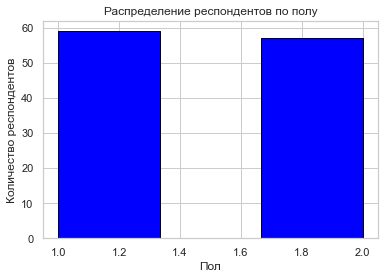

In [78]:
#Посмотрим, как обстоят дела с рапределением по полу в этой выборке.
plt.hist(df['пол'], color = 'blue', edgecolor = 'black',
         bins = int(180/50))

# Add labels
plt.title('Распределение респондентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество респондентов')

print("мужчины - {} человек, женщины - {} человек".format(len(df[df['пол'] ==1]),
                                           len(df[df['пол'] ==2])))

Из 116 человек, прошедших опрос, 50,9% составили мужчины и 49,1% - женщины, что, кстати, соответствует пропорции, существующей в генеральной совокупности.

18-24 = 28 человек, 25-29 = 20 человек, 30-39 = 31 человек, 40-49 24 человек, 50-59 = 9 человек, 60 и более = 4 человек


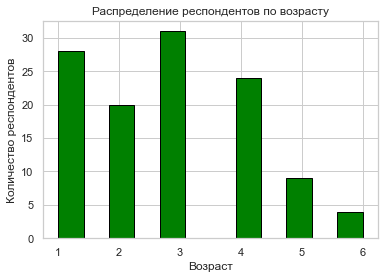

In [79]:
#Теперь посмотрим распределение респондентов по возрасту.
plt.hist(df['Возраст'], color = 'green', edgecolor = 'black',
         bins = int(180/15))

# Add labels
plt.title('Распределение респондентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество респондентов')

print("18-24 = {} человек, 25-29 = {} человек, 30-39 = {} человек, 40-49 {} человек, 50-59 = {} человек, 60 и более = {} человек".format(len(df[df['Возраст'] ==1]),
                                                                                                                                        len(df[df['Возраст'] ==2]),
                                                                                                                                        len(df[df['Возраст'] ==3]),
                                                                                                                                        len(df[df['Возраст'] ==4]),
                                                                                                                                        len(df[df['Возраст'] ==5]),
                                                                                                                                        len(df[df['Возраст'] ==6])))


Так как в последних двух возрастных группах мало респондентов, целесообразным представляется их объединение в одну группу. Так как это было видно невооруженным взглядом, я сделала это еще на этапе подготовки датасета.

18-24 = 28 человек, 25-29 = 20 человек, 30-39 = 31 человек, 40-49 24 человек, 50 и более = 13 человек


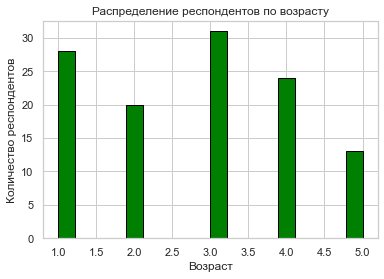

In [83]:
plt.hist(df['Группировка_возраст'], color = 'green', edgecolor = 'black',
         bins = int(180/10))

# Add labels
plt.title('Распределение респондентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество респондентов')

print("18-24 = {} человек, 25-29 = {} человек, 30-39 = {} человек, 40-49 {} человек, 50 и более = {} человек".format(len(df[df['Группировка_возраст'] ==1]),
                                                                                                                                        len(df[df['Группировка_возраст'] ==2]),
                                                                                                                                        len(df[df['Группировка_возраст'] ==3]),
                                                                                                                                        len(df[df['Группировка_возраст'] ==4]),
                                                                                                                                        len(df[df['Группировка_возраст'] ==5])))

Так уже лучше.
Старшая возрастная группа составила 11,2% от общего числа респондентов. 
Небольшое количество респондентов старшей возрастной категории обуславливается методом, использованным при сборе данных – именно эта возрастная категория реже всего пользуется социальными сетями; кроме того, в поле зрения текущего исследования попадают только те люди, которые имеют постоянное место работы, а большинство людей данной возрастной категории являются пенсионерами. В целом же, график повыборке повторяет тенденцию, которая есть в генеральной совокупности (за исключением большого числа самых молодых респондентов). Этот перекс тоже обусловлен методом (онлайн-опрос) и доступностью этой категории.

##  Продолжим с дескриптивным анализом, но уже по существу.

In [ ]:
В целом, интересно посмотреть на общий уровень владения цифровыми навыками, степень мотивации к обучению цифровым навыкам, воспринимаемой сложности обучения и пользования ИКТ и прошлого опыта обучения цифровым навыкам.

In [112]:
# Для этого выдедем таблицу со статистиками.
df.describe()

,пол,Возраст,Группировка_возраст,Уровень_образования,Категория_работающих,Группировка_работающих_новая,Сфера_деятельности,Группировка_сфера,УровеньВладения,ОбучениеЦН,ПрошлыйОпыт,СложностиИКТ,СтепеньМотивации,ГруппировкаСтепеньМотивации,Мотивы,Блок2_1_В1,Блок2_1_В2,Блок2_1_В3,Блок2_2_В1,Блок2_2_В2,Блок2_2_В3,Блок2_3_В1,Блок2_3_В2,Блок2_3_В3,Блок2_4_В1,Блок2_4_В2,Блок2_4_В3,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,0.0,0.0,0.0,0.0
mean,1.491379,2.810345,2.775862,1.732759,2.051724,2.284483,10.879310,1.887931,3.534483,2.629310,3.810345,2.784483,3.267241,2.232759,3.939655,4.051724,3.370690,3.741379,3.413793,3.344828,4.060345,3.379310,3.439655,4.250000,1.568966,2.163793,2.810345,NaN,NaN,NaN,NaN
std,0.502095,1.395108,1.325904,1.152372,1.324320,0.810861,5.914103,0.540073,0.879041,0.973833,0.893589,0.976293,1.246615,0.784167,1.040809,1.028674,1.288951,1.039404,1.216331,1.279290,1.081776,1.336154,1.314063,1.207765,1.621723,1.698818,1.620058,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.750000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000,10.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.500000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000,2.000000,3.000000,NaN,NaN,NaN,NaN
75%,2.000000,4.000000,4.000000,2.000000,3.000000,3.000000,16.000000,2.000000,4.000000,3.000000,4.250000,3.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,3.250000,5.000000,NaN,NaN,NaN,NaN
max,2.000000,6.000000,5.000000,4.000000,5.000000,3.000000,21.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN,NaN,NaN


## Какие можно сделать выводы?
В исследуемой выборке общий уровень владения цифровыми навыками  (3,53±0,88) и  степень мотивации к обучению цифровых навыков (3,27±1,25) имеют средне выраженный уровень.
Медиана общего уровня владения цифровыми навыками и степени мотивации к обучению цифровых навыков составляет 3 балла, что также определяется, как средний уровень.

Средние значения воспринимаемой сложности обучения (2,63±0,974) и сложности пользования ИКТ (2,78±0,976) имеют уровень, немного недостающий до среднего, медиана - 3 балла. Другими словами, опрошенные респонденты, в среднем, представляют себе процесс обучения цифровым навыкам скорее простым, чем сложным и редко испытывают сложности при работе с цифровыми инструментами.

Оценка прошлого опыта обучения цифровым навыкам приближается к значению выше среднего (3,81±0,894). Медиана - 4 балла. То есть в среднем, опрошенные респонденты оценивают свой прошлый опыт обучения цифровым навыкам как в большей степени положительный.

## Проверка распределения на нормальность.
Следующим важным шагом анализа является проверка распределения данных на нормальность.
Вообще, результаты опросов (еще и с таким маленьким числом респондентов) едва ли может пройти тест на нормальность, но для уверенности проверим.
Интересным представляется сравнение двух тестов - Колмогорова-Смирнова (которым я обычно пользуюсь при выборке больше 50) и тестом Шапиро-Уилка (который мы изучали). И хотя второй обычно применяется для малых выборок, в некоторых источниках говорится, что может быть ок и для выборок до 2000 или даже 5000.

In [111]:
#Сначала попробую проверить распределение респондентов по возрастным группам на нормальность с помощью критерия Колмогорова-Смирнова.
from scipy.stats import kstest
data = df['Возраст']
stat, p = kstest(data, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.841, p=0.000
Отклонить гипотезу о нормальности


In [99]:
#Теперь то же самое для Шапиро-Уилка.
from scipy.stats import shapiro
data = df['Возраст']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.911, p=0.000
Отклонить гипотезу о нормальности


In [100]:
#Проверим еще несколько переменных, чтобы убедиться в устойчивости результата.
from scipy.stats import shapiro
data = df['УровеньВладения']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.873, p=0.000
Отклонить гипотезу о нормальности


In [101]:
from scipy.stats import shapiro
data = df['СтепеньМотивации']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.905, p=0.000
Отклонить гипотезу о нормальности


Множественные проверки показали, что переменные не подчиняются закону нормального распределения (<0,0001). В связи с этим для проверки гипотез и дальнейшего анализа данные могут быть обработаны только с помощью непараметрических методов статистики.


## Перейдем к проверке гипотез.
После проведения дескрептивного анализа у меня появились следующие предположения:

1) Чем более негативно человек оценивает свой прошлый опыт обучения (самообучения) цифровым навыкам, тем ниже его мотивация к обучению цифровым навыкам.
2) Чем более сложным работник представляет себе использование ИКТ, тем ниже его мотивация к обучению цифровым навыкам.

Так как данные, которые необходимы для проверки этих предположений, измерены в порядковой шкале, здесь можно использовать корреляционный анализ Спирмена. К тому же эти переменные являются ранжированными.

In [138]:
from scipy.stats import spearmanr
data1 = df["ПрошлыйОпыт"]
data2 = df["СтепеньМотивации"]
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Нет корреляции p=%.3f' % p)
else:
    print('Есть корреляция p=%.3f' % p)

Spearmans correlation coefficient: 0.348
Есть корреляция p=0.000


Предположение 1 подтверждается.
Есть слабая положительная корреляция с высоким уровнем достоверности между прошлым опытом обучения цифровым навыкам и мотивацией к обучению цифровым навыкам (r=0,348 при р<0,01).

In [137]:
from scipy.stats import spearmanr
data1 = df["СложностиИКТ"]
data2 = df["СтепеньМотивации"]
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Нет корреляции p=%.3f' % p)
else:
    print('Есть корреляция p=%.3f' % p)

Spearmans correlation coefficient: -0.423
Есть корреляция p=0.000


 Гипотеза подтвердилась.
Есть слабая отрицательная корреляция с высоким уровнем достоверности между воспринимаемой сложностью использования ИКТ и мотивацией к обучению цифровым навыкам (r=-0,423 при р<0,01). 

<bound method DataFrame.corr of      пол  Возраст  Группировка_возраст  Уровень_образования  \
0      2        4                    4                    1   
1      1        1                    1                    1   
2      1        2                    2                    2   
3      1        1                    1                    4   
4      2        1                    1                    1   
..   ...      ...                  ...                  ...   
111    1        3                    3                    1   
112    1        3                    3                    1   
113    1        5                    5                    1   
114    1        4                    4                    4   
115    1        2                    2                    1   

     Категория_работающих  Группировка_работающих_новая  Сфера_деятельности  \
0                       1                             3                   8   
1                       1                            

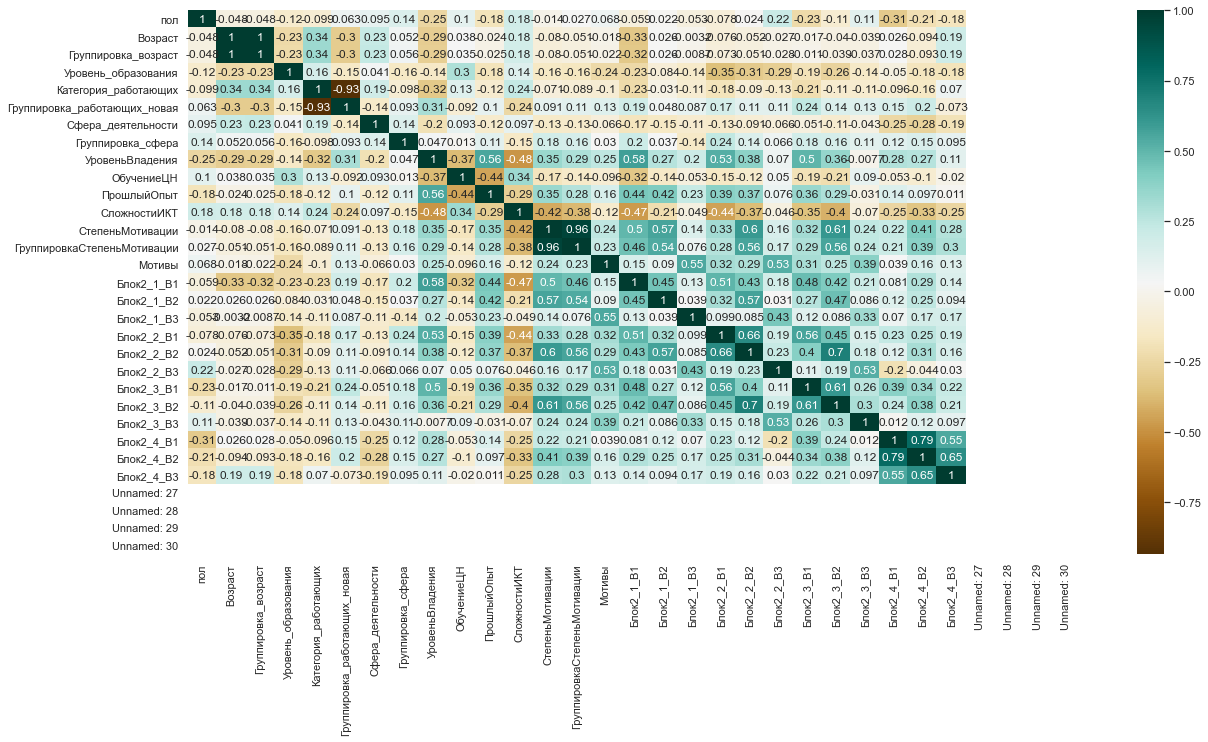

In [129]:
# Какие-то интересные корреляции можно еще попробовать найти на тепловой карте.
plt.figure (figsize= (20,10))
data = df.corr('spearman')
sns.heatmap (data, cmap="BrBG", annot = True)
df.corr

Здесь, например, можно обратить внимание на возможно достоверную положительную корреляцию (хоть и несильную) между уровнем владения цифровыми навыками человека и его мотивацией к их дальнейшему изучению (0,35).

## Подводя итог.

Данный датасет, на самом деле, обладает большим потенциалом для изучения.

В ходе текущей работы я выяснила следующие моменты:


1. С высокой долей достоверности можно утверждать, что негативный прошлый опыт обучения или самообучения цифровым навыкам снижает мотивацию работников к обучению в последующем. Это может быть плохая организация обучения или недостижение работником по итогам обучения желаемой цели. В таком случае работник более вероятно будет избегать повторения подобной ситуации, поскольку ценит свое время, а значит и его мотивация к обучению будет снижаться. Для HR специлистов это означает необходимость обращать внимание не только на содержание обучения, но и обеспечивать положительный опыт этого процесса в целом.
2. Во-вторых, с высоким уровнем достоверности можно утверждать, что чем чаще работник сталкивается со сложностями во время работы с информационно-коммуникационными технологиями, тем ниже его мотивация к обучению цифровым навыкам. Это может быть объяснено тем, что для человека характерно избегание негативных эмоций - испытывая трудности при работе с ИКТ, работник подсознательно не хочет вновь сталкиваться с негативными ощущениями при обучении. И здесь важно поддерживать сотрудников, решившихся на обучение цифровым навыкам, если они относятся к б